# 1. Data Source and Contests

In [59]:
#Loading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [60]:
#Seperate testing and training data 
df_test =df[df['flag']=="test"]
df_train = df[df['flag']=="train"]

In [61]:
df_test_dummies = pd.get_dummies(df_test[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
                                                'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin',
                                                'age_bin']])

df_train_dummies =pd.get_dummies(df_train[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
                                                'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin',
                                                'age_bin']])
y_train = pd.get_dummies(df_train[['y']])
y_test = pd.get_dummies(df_test[['y']])

In [62]:
#importing the Naive Bayes algorithm module Gaussian which is used in classification; it assumes that features follow normal distribution
from sklearn.naive_bayes import GaussianNB 

# using Gaussian Naive Bayes Algorithm
model = GaussianNB()

In [63]:
# Training Naive bayes classifier
print ("Training Model using Gaussian Naive Bayes algorithm .....")
t = model.fit(df_train_dummies, np.ravel(y_train))
print ("Training completed")

Training Model using Gaussian Naive Bayes algorithm .....
Training completed


In [64]:
#Test the unseen passangers from test dataset
print ("testing trained model to predict Test Data labels")
y_predicted = model.predict(df_test_dummies)
print ("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")

testing trained model to predict Test Data labels
Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:


In [65]:
#print accuracy of the model
#In multilabel classification, this function computes subset accuracy

from sklearn.metrics import accuracy_score

# Accuracy score is just percentage of correct predictions
print (accuracy_score(y_test, y_predicted))

0.7871752349364289


In [66]:
# CALCULATE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [67]:
df_table = confusion_matrix(y_test, y_predicted)
print (df_table)


[[9721 2714]
 [ 751 3095]]


In [68]:
# CALCULATE and PRINT AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [70]:
#print roc score 
test_auc = roc_auc_score(y_test, y_predicted)
#ROC AUC Curve
plot_roc_curve(t, df_test_dummies, np.ravel(y_test)

print(test_auc)

SyntaxError: invalid syntax (4185038179.py, line 6)

# 2. Finding Optimal Value of a Key Ensemble Method Hyper-Parameter


In [71]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=3
                           ,random_state=101,max_features=None)
t = t.fit(df_train_dummies, y_train)
y_pred=t.predict(df_test_dummies)

In [72]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf=15)
dtree.fit(df_train_dummies, y_train)
y_pred=dtree.predict(df_test_dummies)

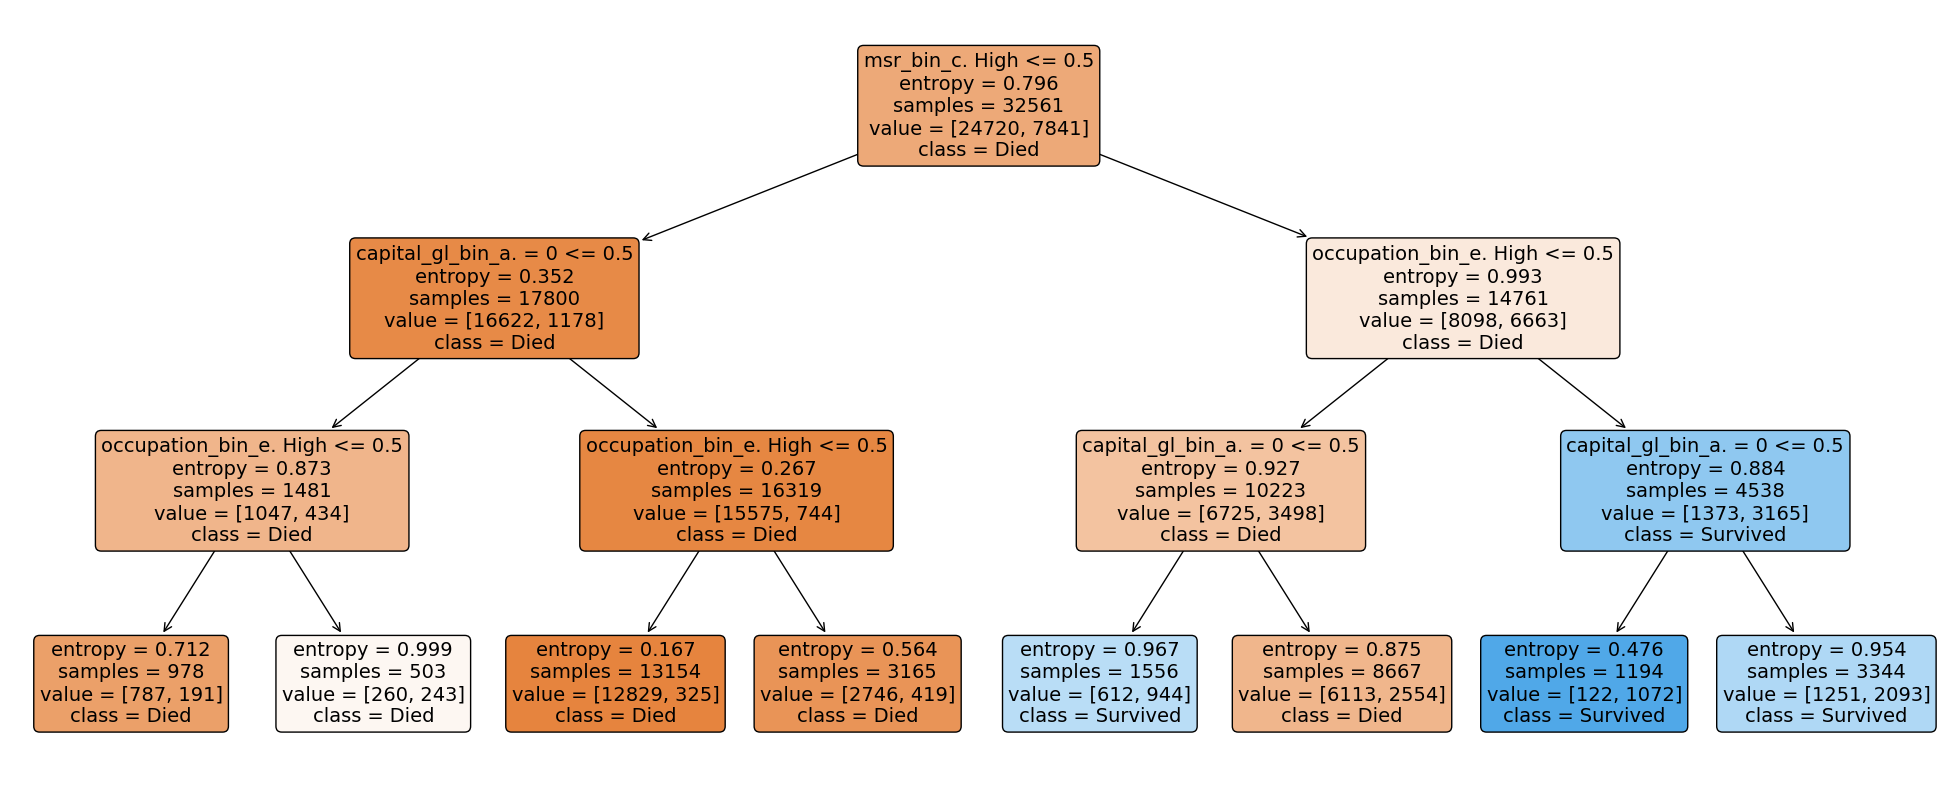

In [73]:
plt.figure(figsize=(25,10))
a = plot_tree(t, feature_names=list(df_train_dummies), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

In [74]:
from sklearn.ensemble import RandomForestClassifier

t = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=101)
t.fit(df_train_dummies,np.ravel(y_train))
y_predicted=t.predict(df_test_dummies)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

t = GradientBoostingClassifier(n_estimators=100)
t.fit(df_train_dummies,np.ravel(y_train))
y_predicted=t.predict(df_test_dummies)


In [76]:
# Check Performance
from sklearn.metrics import classification_report

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.58      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [36]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

acc_results = []
rec_results = []
prec_results = []
f1_results = []
max_depth_options = [2,4,6,8,10,12,14,16]
split_criteria = ['entropy', 'gini'] 
max_features = ['auto',None, .3, .4, .5, .6, .7, .8] 
min_samples_leaf = [5, 10, 15, 20, 25, 30, 35, 40] 

for sc in split_criteria:
    for mf in max_features:
        for msl in min_samples_leaf:
            for trees in max_depth_options:
                model = DecisionTreeClassifier(max_depth=trees, random_state=101)
                model.fit(df_train_dummies, np.ravel(y_train))
                y_pred = model.predict(df_test_dummies)
                accuracy = np.mean(np.ravel(y_test) == y_pred)
                recall = recall_score(np.ravel(y_test), y_pred)
                precision = precision_score(np.ravel(y_test), y_pred)
                f1 = f1_score(np.ravel(y_test),y_pred)


                acc_results.append(accuracy)
                rec_results.append(recall)
                prec_results.append(precision)
                f1_results.append(f1)

## 3. Building a Random Forest Model

<AxesSubplot:>

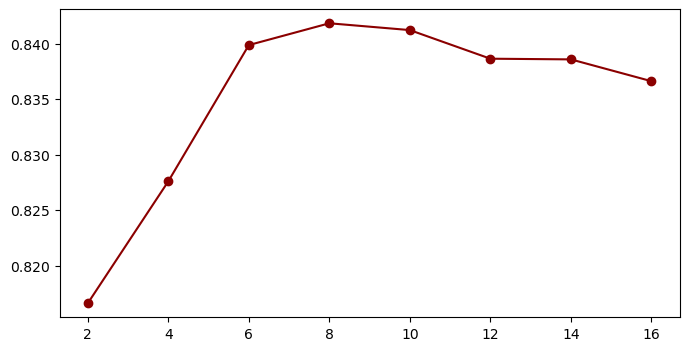

In [77]:

results = []
max_depth_options = [2,4,6,8,10,12,14,16]

for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(df_train_dummies, np.ravel(y_train))
    y_pred = model.predict(df_test_dummies)
    accuracy = np.mean(np.ravel(y_test)==y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

In [94]:
#accuracy vs. n_estimator
from sklearn.metrics import roc_auc_score

results = []
auc_scores = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimators:
    model = RandomForestClassifier(n_estimators = n, random_state=42)
    model.fit(df_train_dummies, np.ravel(y_train))
    y_pred = model.predict(df_test_dummies)
    accuracy = np.mean(np.ravel(y_test)==y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(df_test_dummies)[:,-1])
    results.append(accuracy)
    auc_scores.append(auc)


In [119]:
print(results)

[0.8380320619126589, 0.8377863767581843, 0.8372950064492353, 0.8376635341809471, 0.8379706406240403, 0.8382163257785148, 0.8380934832012775, 0.837172163871998, 0.8365579509858116, 0.837172163871998]


<AxesSubplot:>

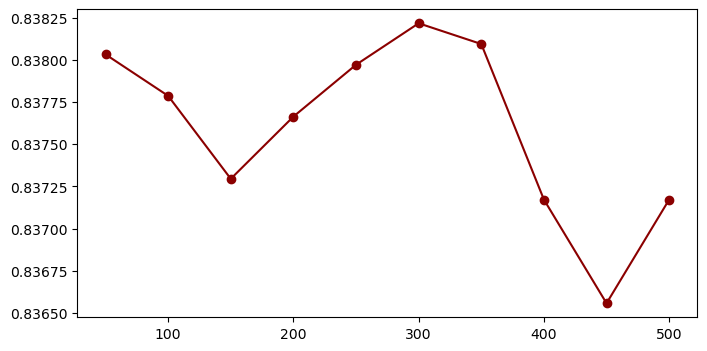

In [95]:
#accuracy vs. n_estimators
plt.figure(figsize=(8,4))
pd.Series(results, n_estimators).plot(color="darkred",marker="o")

<AxesSubplot:>

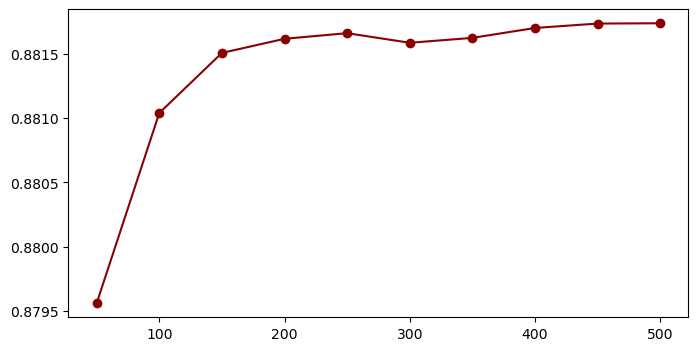

In [96]:
#auc vs. n_estimators
plt.figure(figsize=(8,4))
pd.Series(auc_scores, n_estimators).plot(color="darkred",marker="o")

### 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
For the accuracy v. estimators model, the accuracy score peaks at 300 estimators. However, varies a lot from beginning to end. ultimately we see the worst accuracy score at around 425 estimators for the auc v. estimators model, the peak auc score appears to happen at the end with 500 estimators

### 2. Is there an optimal value of the estimator within the given range?
either 300 or 500


## 4. Building AdaBoost, Gradient Boost, and XGB

## AdaBoost

In [127]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

ada_accuracy_scores = []
ada_auc_scores = []


for n in n_estimators:
    # AdaBoost
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(df_train_dummies, np.ravel(y_train))
    y_pred_ada = ada.predict(df_test_dummies)
    y_prob_ada = ada.predict_proba(df_test_dummies)[:, 1]
    
    ada_accuracy_scores.append(np.mean(np.ravel(y_test)== y_pred_ada))
    ada_auc_scores.append(roc_auc_score(np.ravel(y_test), y_prob_ada))
    



<AxesSubplot:>

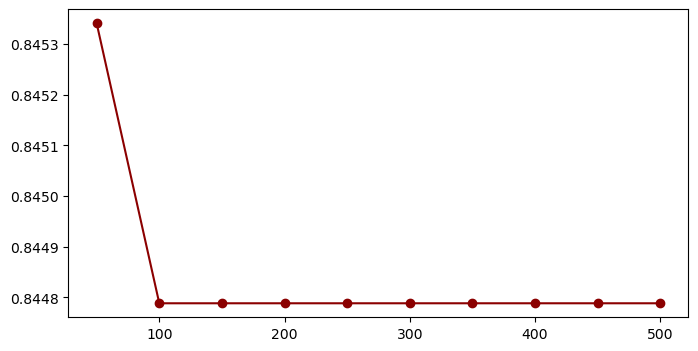

In [129]:
#accuracy vs. n_estimators
plt.figure(figsize=(8,4))
pd.Series(ada_accuracy_scores, n_estimators).plot(color="darkred",marker="o")

<AxesSubplot:>

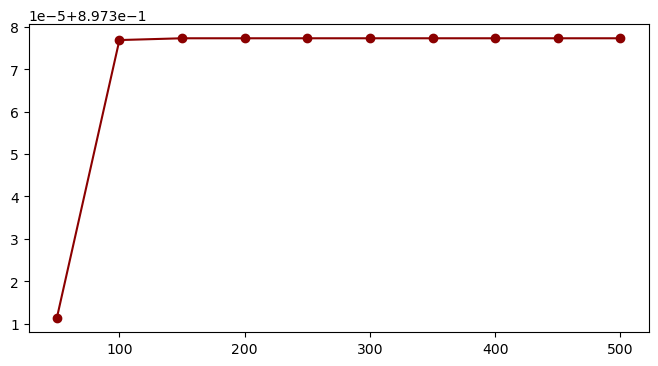

In [130]:
plt.figure(figsize=(8,4))
pd.Series(ada_auc_scores, n_estimators).plot(color="darkred",marker="o")

### 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
For the accuracy v. estimators model, the accuracy score peaks at 0 estimators and falls drastically from there, reaching 0 at 100 estimators and remaining there for the remainder of the model. The opposite applies for the auc score as it peaks at 100 and stays there for the remainder of the model

### 2. Is there an optimal value of the estimator within the given range?
I dont think there is an optimal value as the graphs are invereted from eachother. They perfectly counter eachother.


## Gradient Boost

C:\Users\13235\new_anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13235\new_anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13235\new_anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\13235\new_anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

<AxesSubplot:>

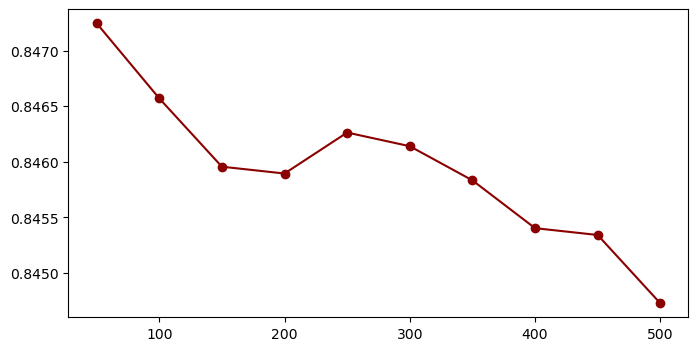

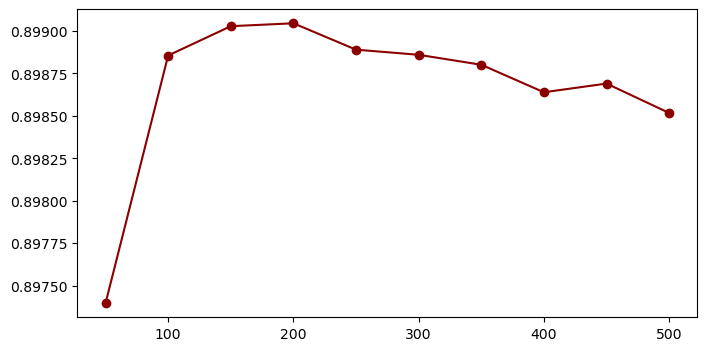

In [131]:
gb_accuracy_scores = []
gb_auc_scores = []

for n in n_estimators:
    # Gradient Boosting
    gb = GradientBoostingClassifier(n_estimators=n, random_state=42)
    gb.fit(df_train_dummies, y_train)
    y_pred_gb = gb.predict(df_test_dummies)
    y_prob_gb = gb.predict_proba(df_test_dummies)[:, 1]
    gb_accuracy_scores.append(np.mean(np.ravel(y_test)== y_pred_gb))
    gb_auc_scores.append(roc_auc_score(np.ravel(y_test), y_prob_gb))
    
#accuracy vs. n_estimators
plt.figure(figsize=(8,4))
pd.Series(gb_accuracy_scores, n_estimators).plot(color="darkred",marker="o")

#Auc vs. n_estimators
plt.figure(figsize=(8,4))
pd.Series(gb_auc_scores, n_estimators).plot(color="darkred",marker="o")
    

### 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
For the accuracy v. estimators model, the accuracy score peaks at 0 estimators and falls throughout the rest of the moodel, reaching 0 at 500 estimators. There is a little increase in accuracy score at around 250 estimators but not nearly as significant of a peak as its first one at 1. The opposite applies for the auc score starts at 0 and peaks around 200 estimators, where it begins to fall slightly down .897 by 500 estimators.

### 2. Is there an optimal value of the estimator within the given range?
For the two, the peak value of estimators might be aound 100


## XGB

<AxesSubplot:>

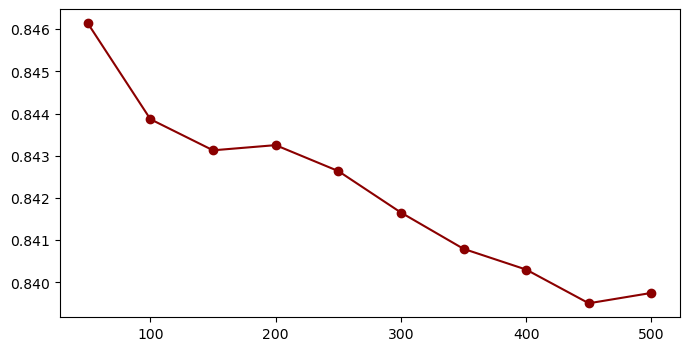

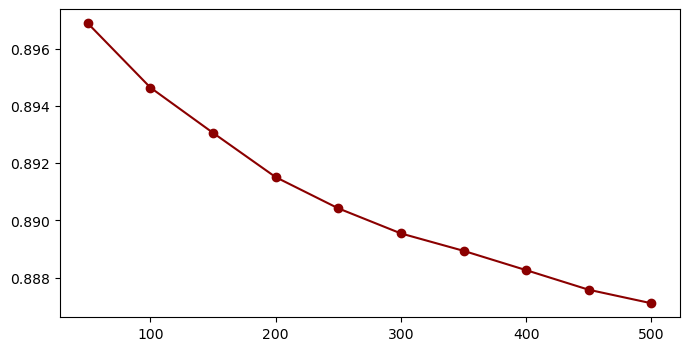

In [144]:

xgb_accuracy_scores = []
xgb_auc_scores = []


# Rename columns to remove brackets and < > characters
df_train_dummies.columns = [c.replace('[','').replace(']','').replace('<','_').replace('>','_') for c in df_train_dummies.columns]
df_test_dummies.columns = [c.replace('[','').replace(']','').replace('<','_').replace('>','_') for c in df_test_dummies.columns]


for n in n_estimators:
    # XGBoost
    xgb = XGBClassifier(n_estimators=n, random_state=42)
    xgb.fit(df_train_dummies, y_train)
    y_pred_xgb = xgb.predict(df_test_dummies)
    y_prob_xgb = xgb.predict_proba(df_test_dummies)[:, 1]
    xgb_accuracy_scores.append(accuracy_score(y_test, y_pred_xgb))
    xgb_auc_scores.append(roc_auc_score(np.ravel(y_test), y_prob_xgb))
    
    
#accuracy vs. n_estimators
plt.figure(figsize=(8,4))
pd.Series(xgb_accuracy_scores, n_estimators).plot(color="darkred",marker="o")

#Auc vs. n_estimators
plt.figure(figsize=(8,4))
pd.Series(xgb_auc_scores, n_estimators).plot(color="darkred",marker="o")
    

### 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
For the accuracy v. estimators model, the accuracy score peaks at 0 estimators and falls throughout the rest of the moodel, reaching 0 at around 450 estimators and rising again at 500 estimators. There is a little increase in accuracy score however is  not nearly as significant as its peak at 0 estimators. The same pattern appears in the AUC model where it experiences its peak accuracy score at 0, and falls almost linearly to its lowest accuracy score at 500 estimators. 

### 2. Is there an optimal value of the estimator within the given range?
For the two, the peak value of estimators might be aound 100


# 5. Compare Performance

In [156]:
#extract index value of highest performing acc score and auc score for all models
accuracy_index = np.argmax(results)
auc_score_index = np.argmax(auc_scores)
accuracy_ada_index = np.argmax(ada_accuracy_scores)
auc_ada_index = np.argmax(ada_auc_scores)
accuracy_gb_index = np.argmax(gb_accuracy_scores)
auc_gb_index = np.argmax(gb_auc_scores)
accuracy_xgb_index = np.argmax(xgb_accuracy_scores)
auc_xgb_index = np.argmax(xgb_auc_scores)

print("Accuracy for Random Forest:", results[accuracy_index])
print("AUC Score for Random Forest:", auc_scores[auc_score_index])
print("Accuracy for AdaBoost:", ada_accuracy_scores[accuracy_ada_index])
print("AUC Score for AdaBoost:", ada_auc_scores[auc_ada_index])
print("Accuracy for Gradient:", gb_accuracy_scores[accuracy_gb_index])
print("AUC Score for GradientBoost:", gb_auc_scores[auc_gb_index])
print("Accuracy for XGB:", xgb_accuracy_scores[accuracy_xgb_index])
print("AUC Score for XGB:", xgb_auc_scores[auc_xgb_index])



Accuracy for Random Forest: 0.8382163257785148
AUC Score for Random Forest: 0.881737703766293
Accuracy for AdaBoost: 0.8453411952582766
AUC Score for AdaBoost: 0.8973772718500216
Accuracy for Gradient: 0.8472452552054542
AUC Score for GradientBoost: 0.8990456248728438
Accuracy for XGB: 0.8461396720103188
AUC Score for XGB: 0.896891521820905


In [158]:

#Creating the table to display all the Accuracy and AUC Scores
data = {' ': ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'],
        'Accuracy': [results[accuracy_index], ada_accuracy_scores[accuracy_ada_index], gb_accuracy_scores[accuracy_gb_index], xgb_accuracy_scores[accuracy_xgb_index]],
        'AUC Score': [auc_scores[auc_score_index], ada_auc_scores[auc_ada_index], gb_auc_scores[auc_gb_index], xgb_auc_scores[auc_xgb_index]]}

all_scores = pd.DataFrame(data)
all_scores = all_scores.set_index(' ').T
all_scores
     

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838216,0.845341,0.847245,0.846140
AUC Score,0.881738,0.897377,0.899046,0.896892
